# Import libraries and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyarrow.parquet as pq  # library to read parquet files

In [2]:
# train data base

train = pd.read_csv('train.csv')
train.head()

,ID,State.Name,Year,Age,Incidence
0,f8312a4,Alabama,1990,65-69,4685.284313
1,3effa36,Alabama,1990,70-74,4827.052043
2,1e8044b,Alabama,1990,75-79,4377.956914
3,d875d65,Alabama,1990,80-84,3822.732993
4,46e6695,Alabama,1990,85-89,3470.199503


In [3]:
test = pd.read_csv('test.csv')
test.head()

,ID,State.Name,Year,Age
0,6c06615,Delaware,1990,65-69
1,e0cf76e,Delaware,1990,70-74
2,e9f95f0,Delaware,1990,75-79
3,5dffe44,Delaware,1990,80-84
4,9f9ea9b,Delaware,1990,85-89


In [4]:
# read parquet file and make it pandas dataframe

haps = pq.read_table('supplementary_HAPS.parquet').to_pandas()
haps.head(3)

,State.Name,Date.Local,Parameter.Name,Arithmetic.Mean,X1st.Max.Value
0,Alabama,1980-01-04,Arsenic (TSP) STP,0.0,0.0
1,Alabama,1980-01-16,Arsenic (TSP) STP,0.0,0.0
2,Alabama,1980-01-28,Arsenic (TSP) STP,0.0,0.0


In [5]:
# lead parquet file into pandas dataframe

lead = pq.read_table('supplementary_LEAD.parquet').to_pandas()
lead.head(3)

,State.Name,Date.Local,Parameter.Name,Arithmetic.Mean,X1st.Max.Value
0,Alabama,1980-01-04,Lead (TSP) STP,0.04,0.04
1,Alabama,1980-01-16,Lead (TSP) STP,0.26,0.26
2,Alabama,1980-01-28,Lead (TSP) STP,0.13,0.13


In [6]:
# nono parquete file into pandas dataframe

nono = pq.read_table('supplementary_NONOxNOy.parquet').to_pandas()
nono.head(3)

,State.Name,Date.Local,Parameter.Name,Arithmetic.Mean,X1st.Max.Value
0,Alabama,1980-01-01,Nitric oxide (NO),54.458333,275.0
1,Alabama,1980-01-02,Nitric oxide (NO),130.545455,279.0
2,Alabama,1980-01-03,Nitric oxide (NO),122.333333,421.0


In [7]:
#vocs parquet file into pandas dataframe

vocs = pq.read_table('supplementary_VOCS.parquet').to_pandas()
vocs.head(3)

,State.Name,Date.Local,Parameter.Name,Arithmetic.Mean,X1st.Max.Value
0,Alabama,1980-01-01,Total NMOC (non-methane organic compound),627.083333,2020.0
1,Alabama,1980-01-02,Total NMOC (non-methane organic compound),1240.909091,3360.0
2,Alabama,1980-01-03,Total NMOC (non-methane organic compound),2079.166667,5670.0


# EDA

In [8]:
# we can see the parquet files have more than 7 million observations, vocs have 26 million observatios
print(train.shape, haps.shape, lead.shape, nono.shape, vocs.shape)

(4500, 5) (9834368, 5) (866835, 5) (7987680, 5) (26601135, 5)


#### First we explore train

In [9]:
# we can see there are no missing values
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          4500 non-null   object 
 1   State.Name  4500 non-null   object 
 2   Year        4500 non-null   int64  
 3   Age         4500 non-null   object 
 4   Incidence   4500 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 175.9+ KB


In [10]:
train.Age.value_counts()

65-69    750
70-74    750
75-79    750
80-84    750
85-89    750
90-94    750
Name: Age, dtype: int64

In [11]:
train['State.Name'].value_counts(dropna = False).head()

Alabama      180
Iowa         180
Texas        180
Tennessee    180
Oregon       180
Name: State.Name, dtype: int64

In [12]:
test['State.Name'].value_counts(dropna = False).head()

Delaware         180
Illinois         180
Wisconsin        180
West Virginia    180
Virginia         180
Name: State.Name, dtype: int64

In [48]:
# We can eliminate years from lead, haps, nono, vocs data bases.
# because we will not use

#train.Year.value_counts(dropna = False).sort_values()
#train.Year.min() #1990
#train.Year.max() #2019
#test.Year.min() #1990
test.Year.max() #2019

2019

2019

In [14]:
train.Incidence.describe()

count    4500.000000
mean     4704.663094
std      1525.974789
min      2725.462720
25%      3448.309431
50%      3999.505948
75%      5862.682928
max      9200.199095
Name: Incidence, dtype: float64

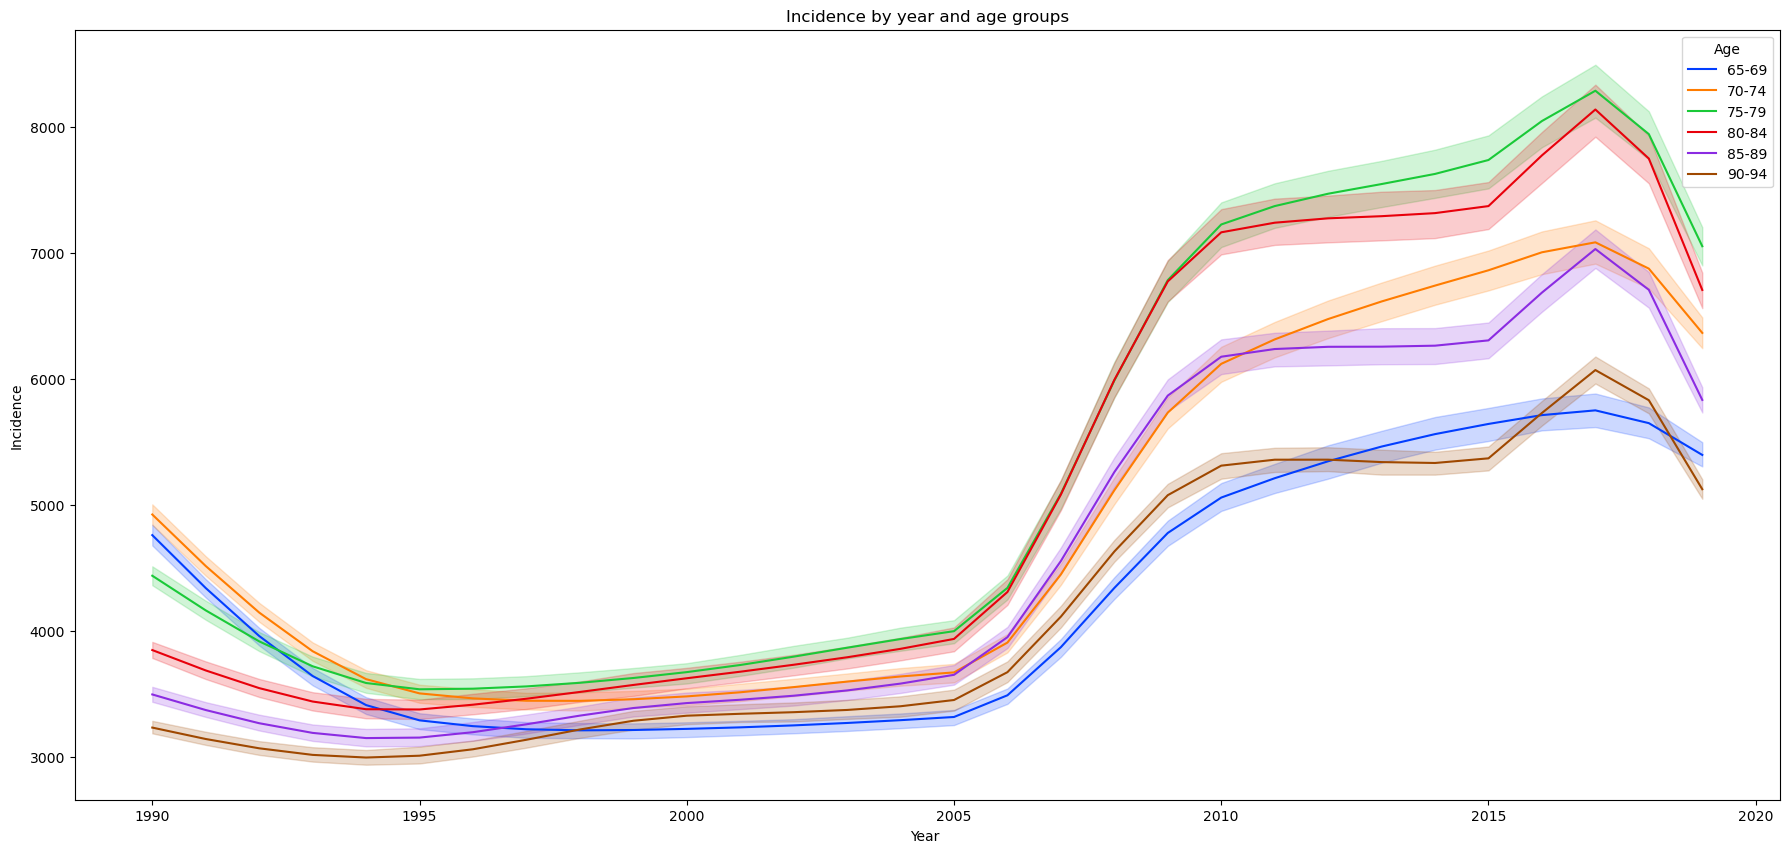

In [15]:
plt.figure(figsize=(22,10))

ax = sns.lineplot(train, x='Year', y='Incidence', hue='Age', palette = 'bright')

ax.set(xlabel='Year ', 
       ylabel='Incidence', 
       title='Incidence by year and age groups');

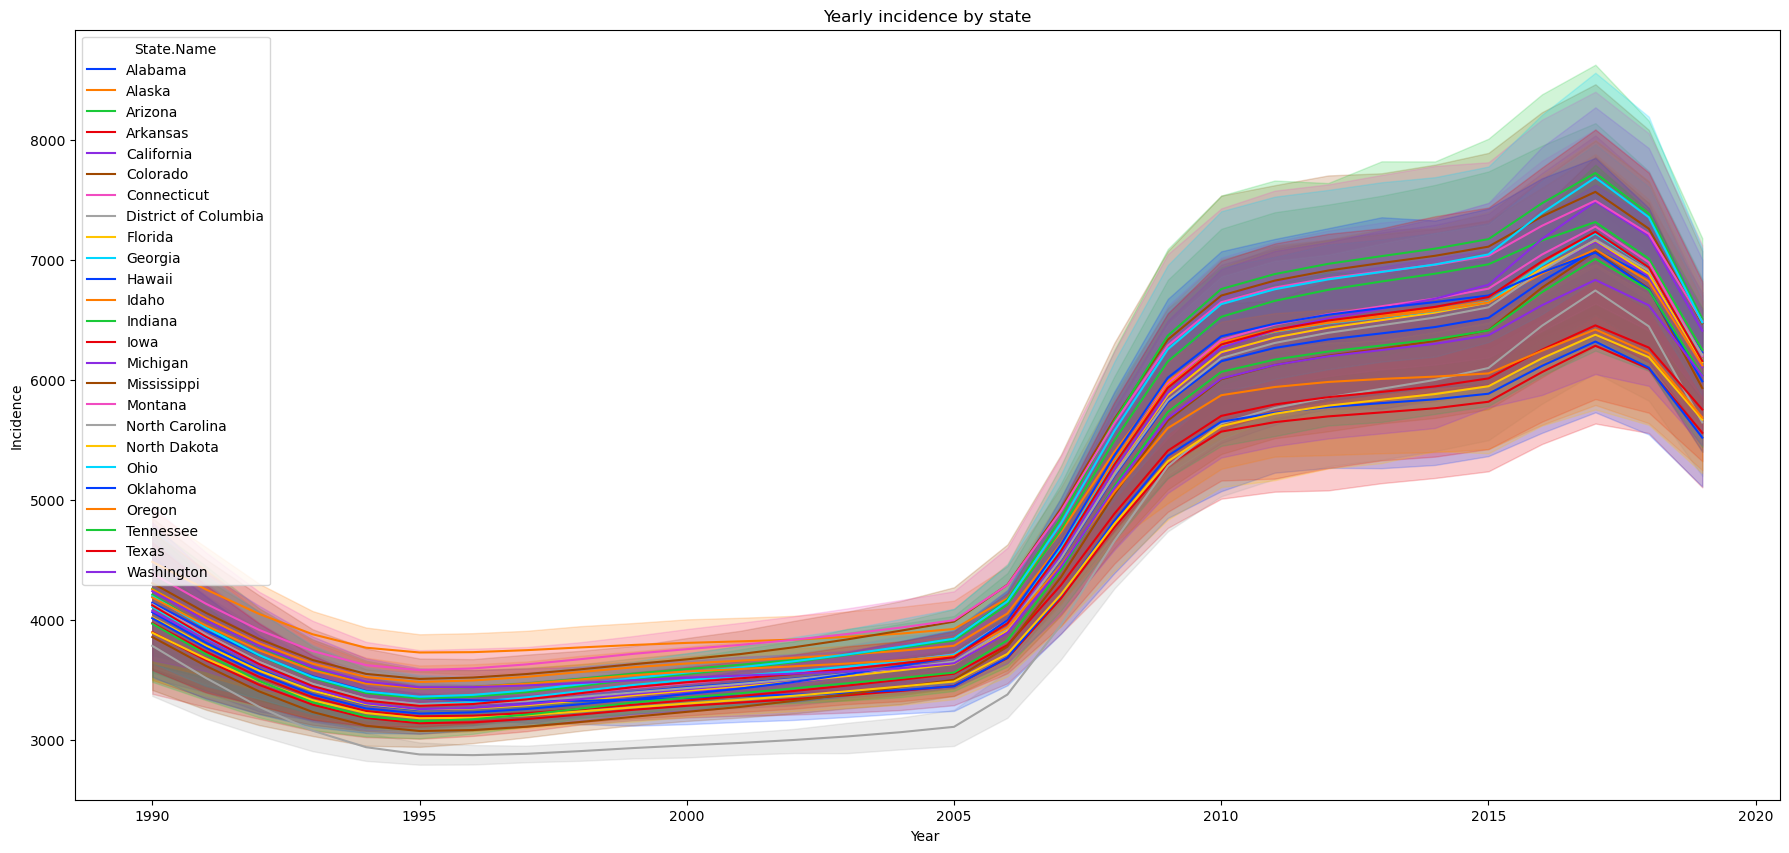

In [16]:
plt.figure(figsize=(22,10))

ax = sns.lineplot(train, x='Year', y='Incidence', hue='State.Name', palette = 'bright')

ax.set(xlabel='Year ', 
       ylabel='Incidence', 
       title='Yearly incidence by state');

## Understand  dates:
- train: yearly info

In [17]:
# more than one observation per month, 12 months per year
lead['Date.Local'].head(10)

0    1980-01-04
1    1980-01-16
2    1980-01-28
3    1980-02-09
4    1980-02-21
5    1980-03-04
6    1980-03-16
7    1980-03-28
8    1980-04-09
9    1980-05-03
Name: Date.Local, dtype: object

In [18]:
lead['State.Name'].value_counts(dropna = False).head()

California        96327
Pennsylvania      86556
Missouri          83480
Texas             77701
South Carolina    48005
Name: State.Name, dtype: int64

In [19]:
lead.isnull().sum()

State.Name         0
Date.Local         0
Parameter.Name     0
Arithmetic.Mean    0
X1st.Max.Value     0
dtype: int64

In [20]:
# I am interested in agregating data BY STATE and keeping 
# - Global max value per year
# - Global max mean value per year
# - Global mean of value per year
# - Global mean of means per year
# Average of monthly averages by state and year

# I need to add month-year column
# I need to add year column

In [40]:
lead['Parameter.Name'].value_counts(dropna = False)

Lead (TSP) STP          706949
Lead (TSP) LC           148507
Lead PM10 LC FRM/FEM     11379
Name: Parameter.Name, dtype: int64

In [21]:
lead['Date.Local'].value_counts(dropna = False)

1986-02-01    779
1985-05-01    777
1986-06-01    744
1983-03-01    688
1985-01-01    670
             ... 
2000-11-19      1
2000-11-13      1
2000-11-07      1
2000-11-03      1
1981-12-13      1
Name: Date.Local, Length: 14571, dtype: int64

In [22]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 866835 entries, 0 to 866834
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   State.Name       866835 non-null  object 
 1   Date.Local       866835 non-null  object 
 2   Parameter.Name   866835 non-null  object 
 3   Arithmetic.Mean  866835 non-null  float64
 4   X1st.Max.Value   866835 non-null  float64
dtypes: float64(2), object(3)
memory usage: 33.1+ MB


In [23]:
lead['Date.Local'] = pd.to_datetime(lead['Date.Local'])

In [24]:
lead['year_month'] = lead['Date.Local'].dt.strftime('%Y-%m')
lead['year'] = lead['Date.Local'].dt.strftime('%Y')


In [25]:
# changing year to integer to aggregate properly
lead['year'] = lead['year'].astype('int')

In [26]:
lead.shape

(866835, 7)

In [49]:
lead.head(2)

,State.Name,Date.Local,Parameter.Name,Arithmetic.Mean,X1st.Max.Value,year_month,year
0,Alabama,1980-01-04,Lead (TSP) STP,0.04,0.04,1980-01,1980
1,Alabama,1980-01-16,Lead (TSP) STP,0.26,0.26,1980-01,1980


### Aggregate by month-year (later by year)

In [50]:
# aggregate by month-year
lead_year_month = lead.groupby(['State.Name','Parameter.Name','year_month']).agg({'year':'mean', 'Arithmetic.Mean':['mean', 'min' ,'max'], 'X1st.Max.Value':['mean', 'min','max']})

In [34]:
#lead_year_month.head()

In [52]:
#lead_year_month_grouped = 
lead_year_month.reset_index(inplace = True)

In [55]:
lead_year_month.head(2)

,State.Name,Parameter.Name,year_month,year,Arithmetic.Mean_m_mean,Arithmetic.Mean_m_min,Arithmetic.Mean_m_max,X1st.Max.Value_m_mean,X1st.Max.Value_m_min,X1st.Max.Value_m_max
0,Alabama,Lead (TSP) LC,2009-01,2009.0,0.271900,0.056,0.686,0.271900,0.056,0.686
1,Alabama,Lead (TSP) LC,2009-02,2009.0,0.619571,0.222,0.914,0.619571,0.222,0.914


In [53]:
lead_year_month.columns = ['State.Name', 'Parameter.Name','year_month', 'year','Arithmetic.Mean_m_mean', 
                           'Arithmetic.Mean_m_min', 'Arithmetic.Mean_m_max', 
                           'X1st.Max.Value_m_mean', 'X1st.Max.Value_m_min', 
                           'X1st.Max.Value_m_max']

In [54]:
lead_year_month.head(3)

,State.Name,Parameter.Name,year_month,year,Arithmetic.Mean_m_mean,Arithmetic.Mean_m_min,Arithmetic.Mean_m_max,X1st.Max.Value_m_mean,X1st.Max.Value_m_min,X1st.Max.Value_m_max
0,Alabama,Lead (TSP) LC,2009-01,2009.0,0.271900,0.056,0.686,0.271900,0.056,0.686
1,Alabama,Lead (TSP) LC,2009-02,2009.0,0.619571,0.222,0.914,0.619571,0.222,0.914
2,Alabama,Lead (TSP) LC,2009-03,2009.0,0.985500,0.042,3.225,0.985500,0.042,3.225


In [59]:
# aggregate by month-year
lead_year = lead_year_month.groupby(['State.Name','Parameter.Name','year']).agg({'Arithmetic.Mean_m_mean':'mean', 
                                                                                 'Arithmetic.Mean_m_min': 'min',
                                                                                 'Arithmetic.Mean_m_max': 'max', 
                                                                                 'X1st.Max.Value_m_mean': 'mean', 
                                                                                 'X1st.Max.Value_m_min':'min', 
                                                                                 'X1st.Max.Value_m_max': 'max'})
lead_year.reset_index(inplace = True)
lead_year.columns = ['State.Name', 'Parameter.Name','year', 'Arithmetic.Mean_m_mean',
                     'Arithmetic.Mean_m_min', 'Arithmetic.Mean_m_max', 'X1st.Max.Value_m_mean',
                     'X1st.Max.Value_m_min', 'X1st.Max.Value_m_max']
lead_year.head(5)

,State.Name,Parameter.Name,year,Arithmetic.Mean_m_mean,Arithmetic.Mean_m_min,Arithmetic.Mean_m_max,X1st.Max.Value_m_mean,X1st.Max.Value_m_min,X1st.Max.Value_m_max
0,Alabama,Lead (TSP) LC,2009.0,0.438238,0.026,3.225,0.438238,0.026,3.225
1,Alabama,Lead (TSP) LC,2010.0,0.628359,0.009,2.651,0.628359,0.009,2.651
2,Alabama,Lead (TSP) LC,2011.0,0.619585,0.013,4.348,0.619585,0.013,4.348
3,Alabama,Lead (TSP) LC,2012.0,0.388591,0.001,5.649,0.388591,0.001,5.649
4,Alabama,Lead (TSP) LC,2013.0,0.135395,0.006,1.026,0.135395,0.006,1.026


In [57]:
# lead shape: (1650, 9)

lead_complete = pd.merge(train, lead_year, how='left', )

(1650, 6)

In [88]:
lead_year.head(5)


,State.Name,Parameter.Name,year,Arithmetic.Mean_m_mean,Arithmetic.Mean_m_min,Arithmetic.Mean_m_max,X1st.Max.Value_m_mean,X1st.Max.Value_m_min,X1st.Max.Value_m_max
0,Alabama,Lead (TSP) LC,2009.0,0.438238,0.026,3.225,0.438238,0.026,3.225
1,Alabama,Lead (TSP) LC,2010.0,0.628359,0.009,2.651,0.628359,0.009,2.651
2,Alabama,Lead (TSP) LC,2011.0,0.619585,0.013,4.348,0.619585,0.013,4.348
3,Alabama,Lead (TSP) LC,2012.0,0.388591,0.001,5.649,0.388591,0.001,5.649
4,Alabama,Lead (TSP) LC,2013.0,0.135395,0.006,1.026,0.135395,0.006,1.026


In [64]:
train.head()

,ID,State.Name,Year,Age,Incidence
0,f8312a4,Alabama,1990,65-69,4685.284313
1,3effa36,Alabama,1990,70-74,4827.052043
2,1e8044b,Alabama,1990,75-79,4377.956914
3,d875d65,Alabama,1990,80-84,3822.732993
4,46e6695,Alabama,1990,85-89,3470.199503


In [68]:
lead_trans = lead_year.pivot(index = ['State.Name', 'year'], columns='Parameter.Name')

In [69]:
lead_trans

Arithmetic.Mean_m_mean                                      \
Parameter.Name             Lead (TSP) LC Lead (TSP) STP Lead PM10 LC FRM/FEM   
State.Name year                                                                
Alabama    1980.0                    NaN       1.011834                  NaN   
           1981.0                    NaN       0.830934                  NaN   
           1982.0                    NaN       0.834853                  NaN   
           1983.0                    NaN       0.853940                  NaN   
           1984.0                    NaN       1.207354                  NaN   
...                                  ...            ...                  ...   
Wyoming    1981.0                    NaN       0.011389                  NaN   
           1982.0                    NaN       0.001091                  NaN   
           1983.0                    NaN       0.007535                  NaN   
           1984.0                    NaN       0.000000                  NaN   
           1985.0                    NaN       0.002140                  NaN   

                  Arithmetic.Mean_m_min                                      \
Parameter.Name            Lead (TSP) LC Lead (TSP) STP Lead PM10 LC FRM/FEM   
State.Name year                                                               
Alabama    1980.0                   NaN          0.020                  NaN   
           1981.0                   NaN          0.000                  NaN   
           1982.0                   NaN          0.016                  NaN   
           1983.0                   NaN          0.000                  NaN   
           1984.0                   NaN          0.000                  NaN   
...                                 ...            ...                  ...   
Wyoming    1981.0                   NaN          0.000                  NaN   
           1982.0                   NaN          0.000                  NaN   
           1983.0                   NaN          0.000                  NaN   
           1984.0                   NaN          0.000                  NaN   
           1985.0                   NaN          0.000                  NaN   

                  Arithmetic.Mean_m_max                                      \
Parameter.Name            Lead (TSP) LC Lead (TSP) STP Lead PM10 LC FRM/FEM   
State.Name year                                                               
Alabama    1980.0                   NaN        11.0800                  NaN   
           1981.0                   NaN        23.2000                  NaN   
           1982.0                   NaN        18.5800                  NaN   
           1983.0                   NaN        18.2400                  NaN   
           1984.0                   NaN        44.3700                  NaN   
...                                 ...            ...                  ...   
Wyoming    1981.0                   NaN         0.0280                  NaN   
           1982.0                   NaN         0.0120                  NaN   
           1983.0                   NaN         0.0149                  NaN   
           1984.0                   NaN         0.0000                  NaN   
           1985.0                   NaN         0.0107                  NaN   

                  X1st.Max.Value_m_mean                                      \
Parameter.Name            Lead (TSP) LC Lead (TSP) STP Lead PM10 LC FRM/FEM   
State.Name year                                                               
Alabama    1980.0                   NaN       1.011834                  NaN   
           1981.0                   NaN       0.830934                  NaN   
           1982.0                   NaN       0.834853                  NaN   
           1983.0                   NaN       0.853940                  NaN   
           1984.0                   NaN       1.207354                  NaN   
...                                 ...            

In [70]:
lead_trans.reset_index(inplace = True)
lead_trans

State.Name    year Arithmetic.Mean_m_mean                 \
Parameter.Name                             Lead (TSP) LC Lead (TSP) STP   
0                 Alabama  1980.0                    NaN       1.011834   
1                 Alabama  1981.0                    NaN       0.830934   
2                 Alabama  1982.0                    NaN       0.834853   
3                 Alabama  1983.0                    NaN       0.853940   
4                 Alabama  1984.0                    NaN       1.207354   
...                   ...     ...                    ...            ...   
1507              Wyoming  1981.0                    NaN       0.011389   
1508              Wyoming  1982.0                    NaN       0.001091   
1509              Wyoming  1983.0                    NaN       0.007535   
1510              Wyoming  1984.0                    NaN       0.000000   
1511              Wyoming  1985.0                    NaN       0.002140   

                                    Arithmetic.Mean_m_min                 \
Parameter.Name Lead PM10 LC FRM/FEM         Lead (TSP) LC Lead (TSP) STP   
0                               NaN                   NaN          0.020   
1                               NaN                   NaN          0.000   
2                               NaN                   NaN          0.016   
3                               NaN                   NaN          0.000   
4                               NaN                   NaN          0.000   
...                             ...                   ...            ...   
1507                            NaN                   NaN          0.000   
1508                            NaN                   NaN          0.000   
1509                            NaN                   NaN          0.000   
1510                            NaN                   NaN          0.000   
1511                            NaN                   NaN          0.000   

                                    Arithmetic.Mean_m_max                 \
Parameter.Name Lead PM10 LC FRM/FEM         Lead (TSP) LC Lead (TSP) STP   
0                               NaN                   NaN        11.0800   
1                               NaN                   NaN        23.2000   
2                               NaN                   NaN        18.5800   
3                               NaN                   NaN        18.2400   
4                               NaN                   NaN        44.3700   
...                             ...                   ...            ...   
1507                            NaN                   NaN         0.0280   
1508                            NaN                   NaN         0.0120   
1509                            NaN                   NaN         0.0149   
1510                            NaN                   NaN         0.0000   
1511                            NaN                   NaN         0.0107   

                                    X1st.Max.Value_m_mean                 \
Parameter.Name Lead PM10 LC FRM/FEM         Lead (TSP) LC Lead (TSP) STP   
0                               NaN                   NaN       1.011834   
1                               NaN                   NaN       0.830934   
2                               NaN                   NaN       0.834853   
3                               NaN                   NaN       0.853940   
4                               NaN                   NaN       1.207354   
...                             ...                   ...            ...   
1507                            NaN                   NaN       0.011389   
1508                            NaN                   NaN       0.001091   
1509                            NaN                   NaN       0.007535   
1510                            NaN                   NaN       0.000000   
1511                            NaN                   NaN       0.002140   

                                    X1st.Max.Value_m_min                

In [76]:
names_lead = lead_trans.columns
names_lead

MultiIndex([(            'State.Name',                     ''),
            (                  'year',                     ''),
            ('Arithmetic.Mean_m_mean',        'Lead (TSP) LC'),
            ('Arithmetic.Mean_m_mean',       'Lead (TSP) STP'),
            ('Arithmetic.Mean_m_mean', 'Lead PM10 LC FRM/FEM'),
            ( 'Arithmetic.Mean_m_min',        'Lead (TSP) LC'),
            ( 'Arithmetic.Mean_m_min',       'Lead (TSP) STP'),
            ( 'Arithmetic.Mean_m_min', 'Lead PM10 LC FRM/FEM'),
            ( 'Arithmetic.Mean_m_max',        'Lead (TSP) LC'),
            ( 'Arithmetic.Mean_m_max',       'Lead (TSP) STP'),
            ( 'Arithmetic.Mean_m_max', 'Lead PM10 LC FRM/FEM'),
            ( 'X1st.Max.Value_m_mean',        'Lead (TSP) LC'),
            ( 'X1st.Max.Value_m_mean',       'Lead (TSP) STP'),
            ( 'X1st.Max.Value_m_mean', 'Lead PM10 LC FRM/FEM'),
            (  'X1st.Max.Value_m_min',        'Lead (TSP) LC'),
            (  'X1st.Max.Value_m_min',  

In [ ]:
'Arithmetic.Mean_m_mean_Lead (TSP) LC'

In [79]:
names_lead[0]

('State.Name', '')

In [80]:
list(names_lead[0])

['State.Name', '']

In [83]:
"_".join(list(names_lead[0]))

'State.Name_'

In [85]:
elements = []

for name in names_lead:
    elements.append("_".join(list(name)))
    
elements

['State.Name_',
 'year_',
 'Arithmetic.Mean_m_mean_Lead (TSP) LC',
 'Arithmetic.Mean_m_mean_Lead (TSP) STP',
 'Arithmetic.Mean_m_mean_Lead PM10 LC FRM/FEM',
 'Arithmetic.Mean_m_min_Lead (TSP) LC',
 'Arithmetic.Mean_m_min_Lead (TSP) STP',
 'Arithmetic.Mean_m_min_Lead PM10 LC FRM/FEM',
 'Arithmetic.Mean_m_max_Lead (TSP) LC',
 'Arithmetic.Mean_m_max_Lead (TSP) STP',
 'Arithmetic.Mean_m_max_Lead PM10 LC FRM/FEM',
 'X1st.Max.Value_m_mean_Lead (TSP) LC',
 'X1st.Max.Value_m_mean_Lead (TSP) STP',
 'X1st.Max.Value_m_mean_Lead PM10 LC FRM/FEM',
 'X1st.Max.Value_m_min_Lead (TSP) LC',
 'X1st.Max.Value_m_min_Lead (TSP) STP',
 'X1st.Max.Value_m_min_Lead PM10 LC FRM/FEM',
 'X1st.Max.Value_m_max_Lead (TSP) LC',
 'X1st.Max.Value_m_max_Lead (TSP) STP',
 'X1st.Max.Value_m_max_Lead PM10 LC FRM/FEM']

In [ ]:
# Make names shorter
# replace spaces

In [86]:
lead_trans.columns = elements

In [87]:
lead_trans.head()

,State.Name_,year_,Arithmetic.Mean_m_mean_Lead (TSP) LC,Arithmetic.Mean_m_mean_Lead (TSP) STP,Arithmetic.Mean_m_mean_Lead PM10 LC FRM/FEM,Arithmetic.Mean_m_min_Lead (TSP) LC,Arithmetic.Mean_m_min_Lead (TSP) STP,Arithmetic.Mean_m_min_Lead PM10 LC FRM/FEM,Arithmetic.Mean_m_max_Lead (TSP) LC,Arithmetic.Mean_m_max_Lead (TSP) STP,Arithmetic.Mean_m_max_Lead PM10 LC FRM/FEM,X1st.Max.Value_m_mean_Lead (TSP) LC,X1st.Max.Value_m_mean_Lead (TSP) STP,X1st.Max.Value_m_mean_Lead PM10 LC FRM/FEM,X1st.Max.Value_m_min_Lead (TSP) LC,X1st.Max.Value_m_min_Lead (TSP) STP,X1st.Max.Value_m_min_Lead PM10 LC FRM/FEM,X1st.Max.Value_m_max_Lead (TSP) LC,X1st.Max.Value_m_max_Lead (TSP) STP,X1st.Max.Value_m_max_Lead PM10 LC FRM/FEM
0,Alabama,1980.0,NaN,1.011834,NaN,NaN,0.020,NaN,NaN,11.08,NaN,NaN,1.011834,NaN,NaN,0.020,NaN,NaN,11.08,NaN
1,Alabama,1981.0,NaN,0.830934,NaN,NaN,0.000,NaN,NaN,23.20,NaN,NaN,0.830934,NaN,NaN,0.000,NaN,NaN,23.20,NaN
2,Alabama,1982.0,NaN,0.834853,NaN,NaN,0.016,NaN,NaN,18.58,NaN,NaN,0.834853,NaN,NaN,0.016,NaN,NaN,18.58,NaN
3,Alabama,1983.0,NaN,0.853940,NaN,NaN,0.000,NaN,NaN,18.24,NaN,NaN,0.853940,NaN,NaN,0.000,NaN,NaN,18.24,NaN
4,Alabama,1984.0,NaN,1.207354,NaN,NaN,0.000,NaN,NaN,44.37,NaN,NaN,1.207354,NaN,NaN,0.000,NaN,NaN,44.37,NaN


#  To do:


- Understand definition of incidence (is it comparable accross States? like incidence per 100,000 persons would be?: 

    "Incidence - This is the target variable representing the incidence rate of chronic respiratory diseases in the given age group. This means how many new cases there are in a year divided by how many people there are in the middle of the year."

- Check how to get rolling mean
- explorar sólo Alabama para ver si incidencia es diaria -- si diaria - quedarnos con máx, min, interval en que esté cada ciudad mediana mas s.d. por año 

# Notes

- we can't eliminate states because there are different states in train and test set

In [44]:
# len(lead.groupby('State.Name')['Date.Local'].count())
lead.groupby('State.Name')['Date.Local'].min()  # 1980-01-01  min

State.Name
Alabama                 1980-01-01
Alaska                  1980-01-04
Arizona                 1980-01-04
Arkansas                1981-01-10
California              1980-01-01
Colorado                1980-01-01
Connecticut             1980-01-04
Delaware                1980-01-04
District of Columbia    1981-07-09
Florida                 1980-01-04
Georgia                 1980-01-04
Hawaii                  1980-01-04
Idaho                   1980-01-01
Illinois                1980-01-01
Indiana                 1980-01-04
Iowa                    1980-01-04
Kansas                  1980-01-04
Kentucky                1980-01-01
Louisiana               1980-01-04
Maine                   1980-01-04
Maryland                1980-01-01
Massachusetts           1980-01-04
Michigan                1980-01-01
Minnesota               1980-01-04
Mississippi             1980-05-27
Missouri                1982-01-05
Montana                 1980-01-01
Nebraska                1980-01-04
Nevada   

In [35]:
lead.columns

Index(['State.Name', 'Date.Local', 'Parameter.Name', 'Arithmetic.Mean',
       'X1st.Max.Value'],
      dtype='object')